In [5]:
# Start of question a:
# Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically,
# you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing.
# You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally
# assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and
# test sets (using 80%-20% randomized split).

import numpy as np
from numpy import *

In [6]:
cd csc478

C:\Users\Shawn\csc478


In [8]:
vs = np.genfromtxt("bank_data.csv", delimiter=",", names=True, dtype=('|S8', int, float, int, '|S8', '|S12', '|S3', '|S3', '|S3', '|S3', '|S3','|S3'))
print vs.dtype.names

('id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep')


In [20]:
vs_records = vs[['age', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']]
vs_records[:5]

array([(48, 17546.0, 1, 'FEMALE', 'INNER_CITY', 'NO', 'NO', 'NO', 'NO', 'NO'),
       (40, 30085.1, 3, 'MALE', 'TOWN', 'YES', 'YES', 'NO', 'YES', 'YES'),
       (51, 16575.4, 0, 'FEMALE', 'INNER_CITY', 'YES', 'YES', 'YES', 'YES', 'NO'),
       (23, 20375.4, 3, 'FEMALE', 'TOWN', 'YES', 'NO', 'NO', 'YES', 'NO'),
       (57, 50576.3, 0, 'FEMALE', 'RURAL', 'YES', 'NO', 'YES', 'NO', 'NO')], 
      dtype=[('age', '<i4'), ('income', '<f8'), ('children', '<i4'), ('gender', 'S8'), ('region', 'S12'), ('married', 'S3'), ('car', 'S3'), ('savings_acct', 'S3'), ('current_acct', 'S3'), ('mortgage', 'S3')])

In [21]:
vs_target = vs['pep']
vs_target[:5]

array(['YES', 'NO', 'NO', 'NO', 'NO'], 
      dtype='|S3')

In [22]:
vs_names = vs_records.dtype.names
vs_names

('age',
 'income',
 'children',
 'gender',
 'region',
 'married',
 'car',
 'savings_acct',
 'current_acct',
 'mortgage')

In [23]:
vs_dict = [dict(zip(vs_names, record)) for record in vs_records]
vs_dict[:2]

[{'age': 48,
  'car': 'NO',
  'children': 1,
  'current_acct': 'NO',
  'gender': 'FEMALE',
  'income': 17546.0,
  'married': 'NO',
  'mortgage': 'NO',
  'region': 'INNER_CITY',
  'savings_acct': 'NO'},
 {'age': 40,
  'car': 'YES',
  'children': 3,
  'current_acct': 'YES',
  'gender': 'MALE',
  'income': 30085.099999999999,
  'married': 'YES',
  'mortgage': 'YES',
  'region': 'TOWN',
  'savings_acct': 'NO'}]

In [25]:
from sklearn.feature_extraction import DictVectorizer
vs_vec = DictVectorizer()
vs_matrix = vs_vec.fit_transform(vs_dict).toarray()
vs_vec.get_feature_names()

['age',
 'car=NO',
 'car=YES',
 'children',
 'current_acct=NO',
 'current_acct=YES',
 'gender=FEMALE',
 'gender=MALE',
 'income',
 'married=NO',
 'married=YES',
 'mortgage=NO',
 'mortgage=YES',
 'region=INNER_CITY',
 'region=RURAL',
 'region=SUBURBAN',
 'region=TOWN',
 'savings_acct=NO',
 'savings_acct=YES']

In [26]:
np.set_printoptions(precision=2, linewidth=100, suppress=True)
print vs_matrix[0:3]

[[    48.       1.       0.       1.       1.       0.       1.       0.   17546.       1.       0.
       1.       0.       1.       0.       0.       0.       1.       0. ]
 [    40.       0.       1.       3.       0.       1.       0.       1.   30085.1      0.       1.
       0.       1.       0.       0.       0.       1.       1.       0. ]
 [    51.       0.       1.       0.       0.       1.       1.       0.   16575.4      0.       1.
       1.       0.       1.       0.       0.       0.       0.       1. ]]


In [27]:
len(vs_matrix)

600

In [28]:
from sklearn.cross_validation import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print vs_train.shape, vs_test.shape
print vs_test[0:3]

(480L, 19L) (120L, 19L)
[[    32.       0.       1.       0.       0.       1.       1.       0.   13267.6      0.       1.
       0.       1.       0.       0.       0.       1.       0.       1. ]
 [    59.       0.       1.       1.       0.       1.       1.       0.   29866.9      1.       0.
       1.       0.       1.       0.       0.       0.       1.       0. ]
 [    61.       1.       0.       3.       0.       1.       0.       1.   41609.5      0.       1.
       0.       1.       0.       1.       0.       0.       0.       1. ]]


In [29]:
# End of question a.

# Start of question b:
# Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that
# all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix
# (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score.
# Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not
# need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).
from sklearn import preprocessing

In [30]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)
vs_train_norm[0:3]

array([[ 0.57,  0.  ,  1.  ,  0.67,  0.  ,  1.  ,  1.  ,  0.  ,  0.46,  0.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.8 ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.78,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.14,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.16,  0.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

In [31]:
vs_test_norm[0:3]

array([[ 0.29,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.12,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.84,  0.  ,  1.  ,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.41,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.88,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.62,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

In [32]:
from sklearn import neighbors, tree, naive_bayes

In [33]:
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [34]:
knnpreds_test = knnclf.predict(vs_test_norm)
print knnpreds_test

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(vs_target_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.68      0.73      0.70        66
        YES       0.63      0.57      0.60        54

avg / total       0.66      0.66      0.66       120



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
knncm = (confusion_matrix(vs_target_test, knnpreds_test))
print knncm

[[48 18]
 [23 31]]


In [39]:
print knnclf.score(vs_test_norm, vs_target_test)

0.658333333333


In [40]:
print knnclf.score(vs_train_norm, vs_target_train)

1.0


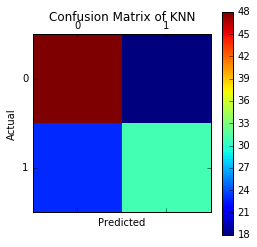

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion Matrix of KNN')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [53]:
def calcScore(vs_train_norm, vs_test_norm, vs_target_train, vs_target_test, k, w):
    knnclf = neighbors.KNeighborsClassifier(k, weights = w)
    knnclf.fit(vs_train_norm, vs_target_train)
    return knnclf.score(vs_test_norm, vs_target_test)

In [54]:
bestK = 0
weight = ''
bestScore = 0.0
for k in range(1, 25):
    for w in ['uniform', 'distance']:
        score = calcScore(vs_train_norm, vs_test_norm, vs_target_train, vs_target_test, k, w)
        if score > bestScore:
            bestScore = score
            bestK = k
            weight = w
print bestK, weight, bestScore

17 uniform 0.7


In [57]:
# As we can see from above result, best accuracy achieved when we use neigbours = 17 and weight = 'uniform'.
# End of question b.

# Start of question c:
# Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the
# naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average
# accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the
# training data sets. What does the comparison tell you in terms of bias-variance trade-off?
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(vs_train, vs_target_train)
treepreds_test = treeclf.predict(vs_test)
print treepreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [58]:
print treeclf.score(vs_test, vs_target_test)

0.816666666667


In [59]:
print treeclf.score(vs_train, vs_target_train)

0.985416666667


In [60]:
print(classification_report(vs_target_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.82      0.85      0.84        66
        YES       0.81      0.78      0.79        54

avg / total       0.82      0.82      0.82       120



In [65]:
treecm = confusion_matrix(vs_target_test, treepreds_test)
print treecm

[[56 10]
 [12 42]]


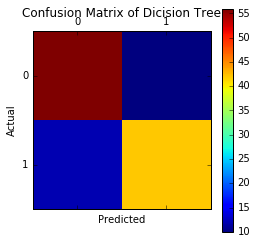

In [66]:
plt.matshow(treecm)
plt.title('Confusion Matrix of Dicision Tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [67]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
nbpreds_test = nbclf.predict(vs_test)
print nbpreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [68]:
print nbclf.score(vs_train, vs_target_train)

0.65625


In [69]:
print nbclf.score(vs_test, vs_target_test)

0.591666666667


In [78]:
print(classification_report(vs_target_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120



In [76]:
nbcm = (confusion_matrix(vs_target_test, nbpreds_test))
print nbcm

[[49 17]
 [32 22]]


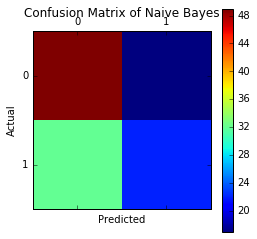

In [77]:
plt.matshow(nbcm)
plt.title('Confusion Matrix of Naive Bayes')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# As we can see from above results, the decision tree classification has the best accuracy score.
# End of question c.

# Start of question d:
# Discuss your observations based on the above experiments.
